In [1]:
%pylab inline
from Chempy.parameter import ModelParameters
a=ModelParameters()

Populating the interactive namespace from numpy and matplotlib


In [55]:
# Import proto-solar data
data=np.load('Chempy/input/stars/Proto-sun_all.npy')
el_names=[el for el in a.elements_to_trace if el!='H']
means=data[el_names][0]
errs=data[el_names][1]

In [56]:
def score_fun(abun):
    from scipy.stats import norm
    out=1.
    for i in range(len(abun)):
        out*=norm.pdf(abun[i],loc=means[i],scale=np.sqrt(2)*errs[i]) # score contribution
    rescaled_out=out**(1./len(abun))
    return rescaled_out

In [57]:
scores=np.zeros(int(1e4))
for j in range(int(1e4)):
    if j % 1000 ==0:
        print(j)
    # Compute random realisation
    abun=[np.random.normal(loc=means[i],scale=errs[i]) for i in range(len(means))]
    scores[j]=score_fun(abun)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [58]:
scores=np.log10(scores)
sc_mean=np.mean(scores)
sc_std=np.std(scores)
sc_med=np.median(scores)
sc_up=np.percentile(scores,100-15.865)
sc_lo=np.percentile(scores,15.865)
print(sc_mean,sc_std)
print('%.4f + %.4f - %.4f' %(sc_med,sc_up-sc_med,sc_med-sc_lo))

0.632500495143 0.0535411229739
0.6414 + 0.0423 - 0.0604


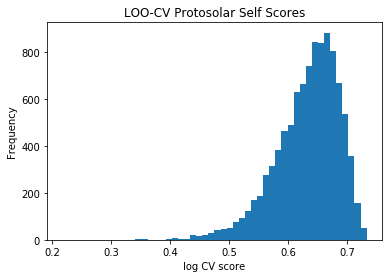

In [60]:
_=plt.hist(scores,bins=50)
plt.ylabel('Frequency')
plt.xlabel('log CV score')
plt.title('LOO-CV Protosolar Self Scores')
plt.savefig('Protosolar_self_scores.png')